In [1]:
import os
os.chdir('D:\Birkbeck\MSc Data Science\Project\Data sets\Selected datasets')

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import skfuzzy as fuzz
from skfuzzy import control as ctrl

from sklearn.preprocessing import MinMaxScaler, StandardScaler

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.precision',2)

import warnings
warnings.filterwarnings('ignore')

### Review data to define universe of discourse & fuzzy sets

In [3]:
data = pd.read_csv('la_file.csv')
data = data.drop(columns ='Unnamed: 0')
data.describe()

,year,g_belt_area,total_area,rpi,int_rate_max,int_rate_min,median_income,all_new_sls_price,det_new_sls_price,semi_new_sls_price,terr_new_sls_price,flat_new_sls_price,all_exist_sls_price,det_exist_sls_price,semi_exist_sls_price,terr_exist_sls_price,flat_exist_sls_price,all_sls_price,det_sls_price,semi_sls_price,terr_sls_price,flat_sls_price,all_new_sls_num,det_new_sls_num,semi_new_sls_num,terr_new_sls_num,flat_new_sls_num,all_exist_sls_num,det_exist_sls_num,semi_exist_sls_num,terr_exist_sls_num,flat_exist_sls_num,all_sls_num,det_sls_num,semi_sls_num,terr_sls_num,flat_sls_num,population,num_hh_1dp,num_hh_>2dp,num_hh_2dp,num_hh_1f,num_hh_1m,num_hh_oth,num_hh_tot,gdp,dwell_stock,net_additions,num_wait_lst,aff_own,aff_rent,aff_int_rent,aff_lon_rent,aff_sh_own,aff_soc_rent,aff_unkwn
count,4291.00,4291.00,4291.00,4291.00,4291.00,4291.00,4291.00,4291.00,4.29e+03,4.29e+03,4.29e+03,4291.00,4291.00,4.29e+03,4291.00,4291.00,4291.00,4291.00,4.29e+03,4291.00,4291.00,4291.00,4291.00,4291.00,4291.00,4291.00,4291.00,4291.00,4291.00,4291.00,4291.00,4291.00,4291.00,4291.00,4291.00,4291.00,4291.00,4.29e+03,4291.00,4291.00,4291.00,4291.00,4291.00,4291.00,4291.00,4291.00,4291.00,4291.00,4284.00,4291.00,4291.00,4291.00,4291.00,4291.00,4291.00,4291.00
mean,2011.03,5709.36,43132.51,233.70,2.14,1.83,24968.45,217573.78,3.31e+05,2.26e+05,2.14e+05,162201.85,187981.56,3.05e+05,192223.70,157351.88,122380.31,191158.34,3.07e+05,194206.28,160439.85,129280.13,313.55,91.90,57.75,59.48,104.42,2630.87,615.59,814.22,839.39,361.68,2944.42,707.49,871.96,898.87,466.10,1.72e+05,9156.78,3396.67,7857.47,11699.65,10042.85,29351.46,71504.88,4279.06,5704.80,591.81,4521.35,34.77,35.58,3.67,0.14,12.57,58.98,0.01
std,5.62,8518.71,54234.04,37.88,2.07,1.83,4291.20,83803.91,1.81e+05,1.12e+05,1.03e+05,72077.80,80956.47,1.44e+05,87528.54,76222.84,48324.70,80739.50,1.42e+05,88094.47,77183.72,49291.66,269.15,98.32,55.05,51.24,170.13,1778.41,389.84,615.68,769.62,428.24,1973.49,447.96,642.52,795.49,540.94,1.20e+05,6611.81,3196.08,5088.49,8186.85,8295.14,18335.66,48744.65,3450.00,9383.19,499.80,6113.84,51.36,72.51,16.08,3.91,34.92,74.22,0.66
min,2002.00,0.00,2140.00,176.20,0.25,0.10,14953.00,61450.00,8.71e+04,3.50e+04,3.80e+04,10000.00,33000.00,8.30e+04,48000.00,25000.00,19725.00,36000.00,8.64e+04,49725.00,25000.00,32000.00,28.00,5.00,5.00,5.00,5.00,368.00,14.00,89.00,73.00,5.00,425.00,23.00,96.00,96.00,14.00,3.53e+04,1522.46,569.29,1607.37,2106.25,1407.10,6255.76,13726.77,608.00,0.00,-2285.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2006.00,0.00,10320.00,198.10,0.50,0.50,21926.50,156997.50,2.29e+05,1.57e+05,1.49e+05,113247.50,130000.00,2.11e+05,130250.00,102425.00,89000.00,132850.00,2.15e+05,132999.00,105200.00,95000.00,147.00,28.00,21.00,24.00,24.00,1559.00,364.00,452.00,398.00,111.00,1763.00,423.00,489.00,438.00,154.50,1.04e+05,5245.21,1777.92,4786.19,6989.56,5381.06,18663.41,43634.21,2221.50,0.00,292.50,1613.00,2.00,0.00,0.00,0.00,0.00,8.00,0.00
50%,2011.00,1340.00,27900.00,235.20,0.75,0.50,24652.00,194995.00,2.85e+05,1.96e+05,1.85e+05,143995.00,171500.00,2.65e+05,170000.00,141000.00,114650.00,174995.00,2.66e+05,170000.00,145000.00,120000.00,240.00,59.00,40.00,45.00,55.00,2147.00,540.00,641.00,599.00,245.00,2422.00,618.00,697.00,656.00,313.00,1.34e+05,6782.33,2435.07,6137.41,8956.19,7225.82,23537.03,55338.32,3318.00,3042.00,465.00,2699.00,19.00,0.00,0.00,0.00,0.00,37.00,0.00
75%,2016.00,8140.00,58060.00,263.10,4.50,4.00,27543.00,254950.00,3.80e+05,2.65e+05,2.50e+05,194950.00,230000.00,3.60e+05,230000.00,191912.50,145000.00,232000.00,3.60e+05,232250.00,195000.00,151849.00,390.00,120.00,75.00,79.00,122.00,3125.00,769.50,981.00,977.50,446.50,3455.00,882.00,1042.50,1053.00,569.00,2.02e+05,11367.72,3917.71,9248.68,14053.81,11737.21,34138.56,84742.97,5128.00,6878.50,711.00,5133.75,47.00,41.00,0.00,0.00,4.00,81.00,0.00
max,2021.00,43570.00,503220.00,305.00,5.75,5.25,43486.00,697373.00,3.59e+06,1.52e+06,1.08e+06,775000.00,600000.00,1.75e+06,750000.00,625000.00,380000.00,598000.00,1.66e+0

In [4]:
data[['median_income', 'all_sls_price']].describe()

,median_income,all_sls_price
count,4291.00,4291.00
mean,24968.45,191158.34
std,4291.20,80739.50
min,14953.00,36000.00
25%,21926.50,132850.00
50%,24652.00,174995.00
75%,27543.00,232000.00
max,43486.00,598000.00


In [5]:
data.all_sls_price.median()

174995.0

In [6]:
data.median_income.median()

24652.0

In [7]:
#review sales by year
sls_yr = pd.DataFrame(data.groupby('year').all_sls_price.median()/1000)
sls_yr['sls_75%'] = data.groupby('year').all_sls_price.quantile(0.75)/1000
sls_yr['sls_25%'] = data.groupby('year').all_sls_price.quantile(0.25)/1000
sls_yr['sls_min'] = data.groupby('year').all_sls_price.min()/1000
sls_yr['sls_max'] = data.groupby('year').all_sls_price.max()/1000
sls_yr['net_additions'] = data.groupby('year').net_additions.sum()
sls_yr = sls_yr.reset_index()
sls_yr

,year,all_sls_price,sls_75%,sls_25%,sls_min,sls_max,net_additions
0,2002,110.00,142.50,78.00,36.00,245.0,96048
1,2003,130.00,165.00,90.00,39.00,250.0,113361
2,2004,147.50,180.34,118.25,51.00,288.0,117216
3,2005,155.00,190.00,122.75,46.38,295.0,134571
4,2006,161.25,195.00,128.50,63.00,320.0,147035
5,2007,175.00,211.54,136.00,76.00,350.0,155691
6,2008,171.00,210.00,133.50,93.75,372.5,150878
7,2009,151.62,185.00,123.50,83.00,350.0,116236
8,2010,166.75,204.38,132.00,89.00,395.0,99959
9,2011,170.00,208.75,128.62,85.00,385.0,96309


In [8]:
#Review income by year
income_yr =pd.DataFrame(data.groupby('year').median_income.median()/1000)
income_yr['inc_75%'] = data.groupby('year').median_income.quantile(0.75)/1000
income_yr['inc_25%'] = data.groupby('year').median_income.quantile(0.25)/1000
income_yr['inc_min'] = data.groupby('year').median_income.min()/1000
income_yr['inc_max'] = data.groupby('year').median_income.max()/1000
income_yr = income_yr.reset_index()
income_yr

,year,median_income,inc_75%,inc_25%,inc_min,inc_max
0,2002,19.37,21.71,18.04,14.95,30.74
1,2003,20.11,22.43,18.52,15.23,30.10
2,2004,20.77,22.88,19.26,15.90,31.76
3,2005,21.62,23.66,19.93,15.17,32.22
4,2006,22.01,24.00,20.51,14.96,34.10
5,2007,22.66,25.02,20.94,16.23,35.58
6,2008,23.60,25.84,21.64,16.43,36.59
7,2009,24.11,26.13,22.47,16.28,37.68
8,2010,24.01,26.41,22.67,17.06,36.28
9,2011,24.58,26.51,22.57,16.93,40.12


In [9]:
sls_inc_data = sls_yr.merge(income_yr, on = 'year')
# based on parameter that low income is 60% of median, also applied as high income as +60%. 
sls_inc_data['l_income_calc'] = sls_inc_data['median_income']/1.6
sls_inc_data['h_income_calc'] = sls_inc_data['median_income']*1.6
sls_inc_data = sls_inc_data.reset_index()
sls_inc_data

,index,year,all_sls_price,sls_75%,sls_25%,sls_min,sls_max,net_additions,median_income,inc_75%,inc_25%,inc_min,inc_max,l_income_calc,h_income_calc
0,0,2002,110.00,142.50,78.00,36.00,245.0,96048,19.37,21.71,18.04,14.95,30.74,12.11,31.00
1,1,2003,130.00,165.00,90.00,39.00,250.0,113361,20.11,22.43,18.52,15.23,30.10,12.57,32.17
2,2,2004,147.50,180.34,118.25,51.00,288.0,117216,20.77,22.88,19.26,15.90,31.76,12.98,33.23
3,3,2005,155.00,190.00,122.75,46.38,295.0,134571,21.62,23.66,19.93,15.17,32.22,13.51,34.59
4,4,2006,161.25,195.00,128.50,63.00,320.0,147035,22.01,24.00,20.51,14.96,34.10,13.76,35.22
5,5,2007,175.00,211.54,136.00,76.00,350.0,155691,22.66,25.02,20.94,16.23,35.58,14.16,36.25
6,6,2008,171.00,210.00,133.50,93.75,372.5,150878,23.60,25.84,21.64,16.43,36.59,14.75,37.76
7,7,2009,151.62,185.00,123.50,83.00,350.0,116236,24.11,26.13,22.47,16.28,37.68,15.07,38.57
8,8,2010,166.75,204.38,132.00,89.00,395.0,99959,24.01,26.41,22.67,17.06,36.28,15.01,38.42
9,9,2011,170.00,208.75,128.62,85.00,385.0,96309,24.58,26.51,22.57,16.93,40.12,15.36,39.33


In [10]:
sls_inc_data.describe()

,index,year,all_sls_price,sls_75%,sls_25%,sls_min,sls_max,net_additions,median_income,inc_75%,inc_25%,inc_min,inc_max,l_income_calc,h_income_calc
count,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00
mean,9.50,2011.50,187.78,233.97,140.63,81.37,418.07,126973.30,24.67,26.92,22.91,18.31,36.91,15.42,39.47
std,5.92,5.92,46.54,57.09,31.94,24.80,111.39,25068.85,3.00,3.07,2.84,2.94,3.74,1.88,4.80
min,0.00,2002.00,110.00,142.50,78.00,36.00,245.00,92187.00,19.37,21.71,18.04,14.95,30.10,12.11,31.00
25%,4.75,2006.75,159.68,193.75,127.25,71.25,342.50,103198.25,22.50,24.76,20.83,16.15,35.21,14.06,36.00
50%,9.50,2011.50,174.11,215.77,134.25,84.00,400.00,123973.00,24.76,26.74,22.87,17.43,37.29,15.47,39.61
75%,14.25,2016.25,218.18,280.00,154.92,95.34,499.12,150092.75,26.61,28.92,24.83,19.96,38.66,16.63,42.58
max,19.00,2021.00,295.00,349.00,220.25,125.00,598.00,166197.00,29.86,32.07,27.88,24.25,43.49,18.66,47.78


## Fuzzy System -  Affordability Score

In [11]:
# Antecedent/Consequent for universe variables & membership functions
income = ctrl.Antecedent(np.arange(0, 60, 1), 'income')
price = ctrl.Antecedent(np.arange(0, 600, 10), 'price')
afford = ctrl.Consequent(np.arange(1, 90, 1), 'affordability')

In [12]:
# Custom membership functions 
income['low'] = fuzz.trapmf(income.universe,[0,0,15,25])
income['medium'] = fuzz.trimf(income.universe,[15.5,25,40])
income['high'] = fuzz.trapmf(income.universe,[30,40,60,60])

price['low'] = fuzz.trapmf(price.universe,[0,0,75,175])
price['medium'] = fuzz.trimf(price.universe,[75,200,325])
price['high'] = fuzz.trapmf(price.universe,[250,400,600,600])

afford['low'] = fuzz.trapmf(afford.universe, [0, 0, 20, 35])
afford['medium'] = fuzz.trimf(afford.universe, [15, 30, 45])
afford['high'] = fuzz.trapmf(afford.universe, [25, 40, 90,100])

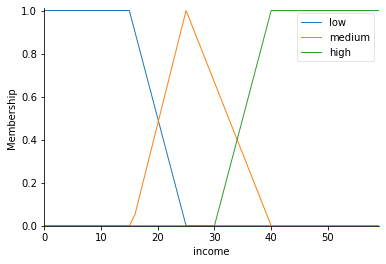

In [13]:
income.view()

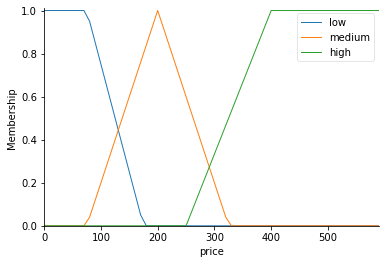

In [14]:
price.view()

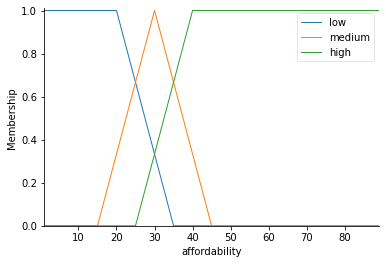

In [15]:
afford.view()

In [16]:
#set the rules
rule1 = ctrl.Rule(income['low'] & price['low']| 
                  income['medium'] & price['low']|
                  income['high'] & price['low']|
                  income['high'] & price['medium'], afford['high'])
                  
rule2 = ctrl.Rule(income['low'] & price['medium']|
                  income['low'] & price['high']| 
                  income['medium']  & price['high'], afford['low'])

rule3 = ctrl.Rule(income['medium'] & price['medium']| 
                  income['high'] & price['high'], afford['medium'])

In [17]:
# Crontol system
afford_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
affordability = ctrl.ControlSystemSimulation(afford_ctrl)

In [18]:
# test using antecedent labels, low income and high price ,should be an unaffordable score/ low affordability score
affordability.input['income'] = 17.92
affordability.input['price'] = 349

affordability.compute()

Low income, high price, affordability score:  16


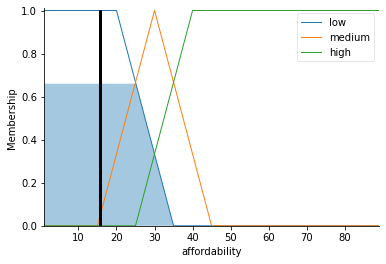

In [19]:
print('Low income, high price, affordability score: ',round(affordability.output['affordability']))
afford.view(sim=affordability)

In [20]:
# test high income, high price, should be medium affordability score
inp_dict = {'income': 50, 'price': 350}
affordability.inputs(inp_dict)

affordability.compute()

High income, high price, affordability score:  30


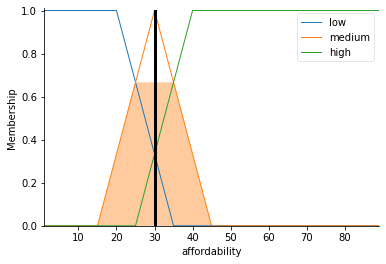

In [21]:
print('High income, high price, affordability score: ',round(affordability.output['affordability']))
afford.view(sim=affordability)

High income, High price, affordability score:  49


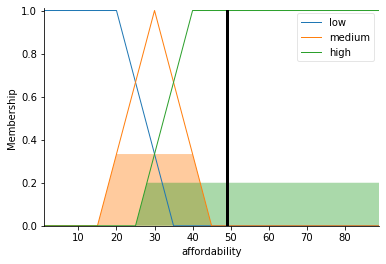

In [22]:
# test high income,  High price, should be medium to high affordability score
inp_dict = {'income': 40, 'price': 300}
affordability.inputs(inp_dict)
affordability.compute()
print('High income, High price, affordability score: ', round(affordability.output['affordability']))
afford.view(sim=affordability)

Unsurpising, as the price changes little when doubling the net additions (adding dwellings) then the affordability score varies little. 

### Apply to years data

Have prices become more or less affordable over the years?

In [23]:
inc_sls_yr = pd.DataFrame(sls_inc_data[['year','median_income', 'all_sls_price']])
#inc_sls_yr

In [24]:
aff_score_lst = []
def affordability_score(obs_ref,income_value, price_value):
    affordability.input['income'] = income_value
    affordability.input['price'] = price_value
    affordability.compute()
    aff_score_lst.append(affordability.output['affordability'])
    print(affordability.output['affordability'])

In [25]:
yr_lst = (inc_sls_yr['year']).to_list()
inc_lst = (inc_sls_yr['median_income']).to_list()
pr_lst = (inc_sls_yr['all_sls_price']).to_list()
data_lst_yr = list(zip(yr_lst, inc_lst, pr_lst))

aff_score_lst = []
for yr, inc, val in data_lst_yr:
    affordability_score(yr, inc, val)

inc_sls_yr['aff_score'] = aff_score_lst
inc_sls_yr

51.027885704322244
45.22270731940068
39.62978730177947
37.71851003030535
35.07806311158223
28.042192281486017
31.551672764414082
44.44271808189336
35.42755220596932
34.04337992057814
33.35004765666463
32.63550899811977
30.000000000000007
30.0
30.000000000000007
30.00000000000001
30.000000000000004
29.999999999999996
29.248225462428756
21.194941199474847


,year,median_income,all_sls_price,aff_score
0,2002,19.37,110.00,51.03
1,2003,20.11,130.00,45.22
2,2004,20.77,147.50,39.63
3,2005,21.62,155.00,37.72
4,2006,22.01,161.25,35.08
5,2007,22.66,175.00,28.04
6,2008,23.60,171.00,31.55
7,2009,24.11,151.62,44.44
8,2010,24.01,166.75,35.43
9,2011,24.58,170.00,34.04


In [26]:
# add net additions per year...

inc_sls_yr['net_additions'] = sls_yr['net_additions']
inc_sls_yr

,year,median_income,all_sls_price,aff_score,net_additions
0,2002,19.37,110.00,51.03,96048
1,2003,20.11,130.00,45.22,113361
2,2004,20.77,147.50,39.63,117216
3,2005,21.62,155.00,37.72,134571
4,2006,22.01,161.25,35.08,147035
5,2007,22.66,175.00,28.04,155691
6,2008,23.60,171.00,31.55,150878
7,2009,24.11,151.62,44.44,116236
8,2010,24.01,166.75,35.43,99959
9,2011,24.58,170.00,34.04,96309


In [27]:
# scale for plotting
aff_net_scaled = pd.DataFrame(inc_sls_yr)
scaler = MinMaxScaler()
aff_net_scaled[['aff_score','net_additions', 'median_income', 'all_sls_price']] =scaler.fit_transform(
    aff_net_scaled[['aff_score','net_additions', 'median_income', 'all_sls_price']])

aff_net_scaled

,year,median_income,all_sls_price,aff_score,net_additions
0,2002,0.00,0.00,1.00,0.05
1,2003,0.07,0.11,0.81,0.29
2,2004,0.13,0.20,0.62,0.34
3,2005,0.21,0.24,0.55,0.57
4,2006,0.25,0.28,0.47,0.74
5,2007,0.31,0.35,0.23,0.86
6,2008,0.40,0.33,0.35,0.79
7,2009,0.45,0.22,0.78,0.32
8,2010,0.44,0.31,0.48,0.11
9,2011,0.50,0.32,0.43,0.06


Text(0.5, 1.0, 'Affordability Score and Net Additions \n England 2002-2021')

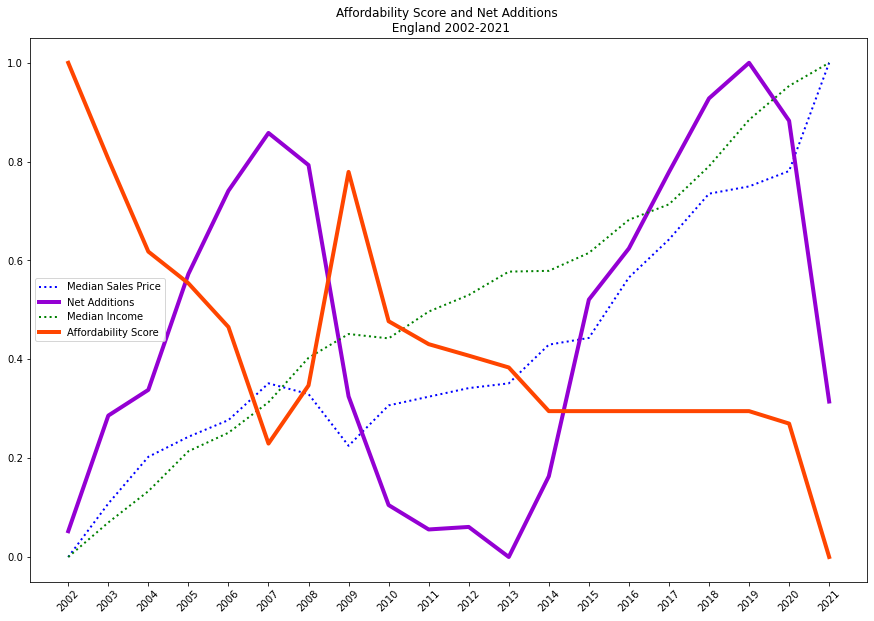

In [28]:
x = range(2002,2022)
fig, ax = plt.subplots(figsize=(15, 10))
plt.plot(x,aff_net_scaled['all_sls_price'], linewidth = 2 , color = 'blue', linestyle = ':', label = 'Median Sales Price')
plt.plot(x,aff_net_scaled['net_additions'], linewidth = 4 , color = 'darkviolet', label = 'Net Additions')
plt.plot(x,aff_net_scaled['median_income'], linewidth = 2 , color = 'green', linestyle = ':',label = 'Median Income')
plt.plot(x,aff_net_scaled['aff_score'], linewidth = 4 , color = 'orangered', label = 'Affordability Score')
ax.set_xticks(range(2002,2022))
ax.set_xticklabels(range(2002,2022),rotation = 45)
plt.legend()
plt.title('Affordability Score and Net Additions \n England 2002-2021')

In [29]:
# Next - adjust for inflation and run fuzzy and graph again for years.

In [30]:
#rpi can use median (or min or max) as groupby measure as rpi is one value per year
adj_data =pd.DataFrame(data.groupby('year').all_sls_price.median()/1000)
adj_data['median_income'] =data.groupby('year').median_income.median()/1000
adj_data['rpi'] =data.groupby('year').rpi.median()
adj_data['net_additions'] = data.groupby('year').net_additions.sum()
adj_data = adj_data.reset_index()

adj_data['sls_adj'] = adj_data['all_sls_price']/(adj_data['rpi']/100)
adj_data['income_adj'] = adj_data['median_income']/(adj_data['rpi']/100)

adj_data

,year,all_sls_price,median_income,rpi,net_additions,sls_adj,income_adj
0,2002,110.00,19.37,176.2,96048,62.43,11.00
1,2003,130.00,20.11,181.3,113361,71.70,11.09
2,2004,147.50,20.77,186.7,117216,79.00,11.13
3,2005,155.00,21.62,192.0,134571,80.73,11.26
4,2006,161.25,22.01,198.1,147035,81.40,11.11
5,2007,175.00,22.66,206.6,155691,84.70,10.97
6,2008,171.00,23.60,214.8,150878,79.61,10.99
7,2009,151.62,24.11,213.7,116236,70.95,11.28
8,2010,166.75,24.01,223.6,99959,74.58,10.74
9,2011,170.00,24.58,235.2,96309,72.28,10.45


In [31]:
yr_lst = (adj_data['year']).to_list()
inc_lst = (adj_data['income_adj']).to_list()
pr_lst = (adj_data['sls_adj']).to_list()
data_lst_yr = list(zip(yr_lst, inc_lst, pr_lst))

aff_score_lst = []
for yr, inc, val in data_lst_yr:
    affordability_score(yr, inc, val)

adj_data['aff_score'] = aff_score_lst
adj_data

60.584070796460175
60.41465036097476
59.67606995126495
59.42275464089986
59.28407754452302
58.57715291464058
59.61385263453413
60.489548234501974
60.12673227921956
60.357285235811226
60.4475639546157
60.584070796460175
60.18280725383831
60.157020013627154
59.24656211573603
58.734899929380724
57.98777276210079
58.26368897881529
58.10606441421991
55.76347132529529


,year,all_sls_price,median_income,rpi,net_additions,sls_adj,income_adj,aff_score
0,2002,110.00,19.37,176.2,96048,62.43,11.00,60.58
1,2003,130.00,20.11,181.3,113361,71.70,11.09,60.41
2,2004,147.50,20.77,186.7,117216,79.00,11.13,59.68
3,2005,155.00,21.62,192.0,134571,80.73,11.26,59.42
4,2006,161.25,22.01,198.1,147035,81.40,11.11,59.28
5,2007,175.00,22.66,206.6,155691,84.70,10.97,58.58
6,2008,171.00,23.60,214.8,150878,79.61,10.99,59.61
7,2009,151.62,24.11,213.7,116236,70.95,11.28,60.49
8,2010,166.75,24.01,223.6,99959,74.58,10.74,60.13
9,2011,170.00,24.58,235.2,96309,72.28,10.45,60.36


In [32]:
adj_scaled = pd.DataFrame(adj_data)
scaler = MinMaxScaler()
adj_scaled[['aff_score','net_additions', 'sls_adj', 'income_adj']] =scaler.fit_transform(
   adj_scaled[['aff_score','net_additions', 'sls_adj', 'income_adj']])

# adj_scaled

Text(0.5, 1.0, 'Adjusted for inflation: Affordability Score and Net Additions \n England 2002-2021')

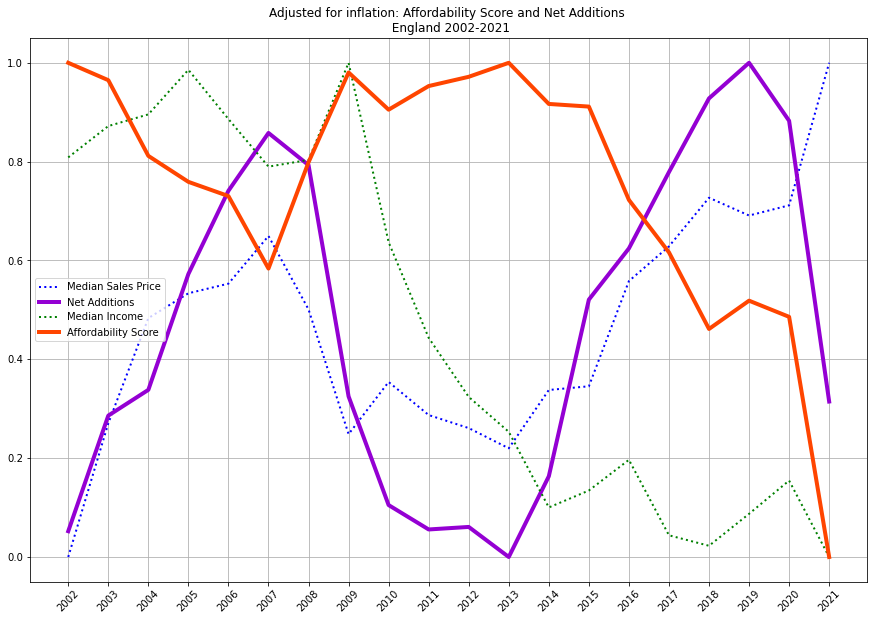

In [33]:
x = range(2002,2022)
fig, ax = plt.subplots(figsize=(15, 10))
plt.plot(x,adj_scaled[ 'sls_adj'], linewidth = 2 , color = 'blue', linestyle = ':', label = 'Median Sales Price')
plt.plot(x,adj_scaled['net_additions'], linewidth = 4 , color = 'darkviolet', label = 'Net Additions')
plt.plot(x,adj_scaled['income_adj'], linewidth = 2 , color = 'green', linestyle = ':',label = 'Median Income')
plt.plot(x,adj_scaled['aff_score'], linewidth = 4 , color = 'orangered', label = 'Affordability Score')
ax.set_xticks(range(2002,2022))
ax.set_xticklabels(range(2002,2022),rotation = 45)
plt.legend()
plt.grid()
plt.title('Adjusted for inflation: Affordability Score and Net Additions \n England 2002-2021')

In [34]:
# apply to the dummy set, import the test set to match the incomes

dummy = pd.read_csv( 'mod_e__dummy_output.csv')
dummy = dummy.drop(columns =['Unnamed: 0','pred'])
dummy = dummy.melt('obs_ref')
t_set = pd.read_csv('test_best.csv')
t_data = t_set.iloc[[368,438,529,556,602,711]].reset_index(drop = True)
t_data = t_data.loc[: ,['Unnamed: 0', 'median_income']]
t_data['median_income'] = t_data['median_income']/1000
t_data = t_data.rename(columns = {'Unnamed: 0': 'obs_ref'})
dummy = dummy.merge(t_data)
dummy

,obs_ref,variable,value,median_income
0,368,actual,157.50,25.18
1,368,d_pred,147.85,25.18
2,368,h_pred,161.93,25.18
3,438,actual,140.00,26.35
4,438,d_pred,133.08,26.35
5,438,h_pred,140.91,26.35
6,529,actual,265.00,27.90
7,529,d_pred,258.51,27.90
8,529,h_pred,268.09,27.90
9,556,actual,235.00,30.31


In [35]:
val_lst = (dummy['value']).to_list()
inc_lst = (dummy['median_income']).to_list()
obs_lst = (dummy['obs_ref']).to_list()

In [36]:
data_lst = list(zip(obs_lst, inc_lst,val_lst))
data_lst

[(368, 25.177, 157.5),
 (368, 25.177, 147.84988),
 (368, 25.177, 161.92775),
 (438, 26.354, 139.995),
 (438, 26.354, 133.08032),
 (438, 26.354, 140.91193),
 (529, 27.896, 265.0),
 (529, 27.896, 258.50974),
 (529, 27.896, 268.08652),
 (556, 30.31, 235.0),
 (556, 30.31, 225.26492),
 (556, 30.31, 239.76878),
 (602, 31.997, 460.0),
 (602, 31.997, 309.94012),
 (602, 31.997, 317.90155),
 (711, 31.022, 395.0),
 (711, 31.022, 243.5341),
 (711, 31.022, 246.55913)]

In [37]:
aff_score_lst = []
for obs, inc, val in data_lst:
    affordability_score(obs, inc, val)

dummy['aff_score'] = aff_score_lst
dummy

43.59406072896764
48.06206306787487
41.01462545017965
50.886233361229934
52.95748453063551
50.586300230842
27.42503084598464
28.572978253671298
26.860682939694556
33.49628775464781
33.49628775464781
33.49628775464781
18.57473351433979
32.43035841207846
25.698629949923873
17.154471722889532
39.76526132874986
39.76526132874986


,obs_ref,variable,value,median_income,aff_score
0,368,actual,157.50,25.18,43.59
1,368,d_pred,147.85,25.18,48.06
2,368,h_pred,161.93,25.18,41.01
3,438,actual,140.00,26.35,50.89
4,438,d_pred,133.08,26.35,52.96
5,438,h_pred,140.91,26.35,50.59
6,529,actual,265.00,27.90,27.43
7,529,d_pred,258.51,27.90,28.57
8,529,h_pred,268.09,27.90,26.86
9,556,actual,235.00,30.31,33.50


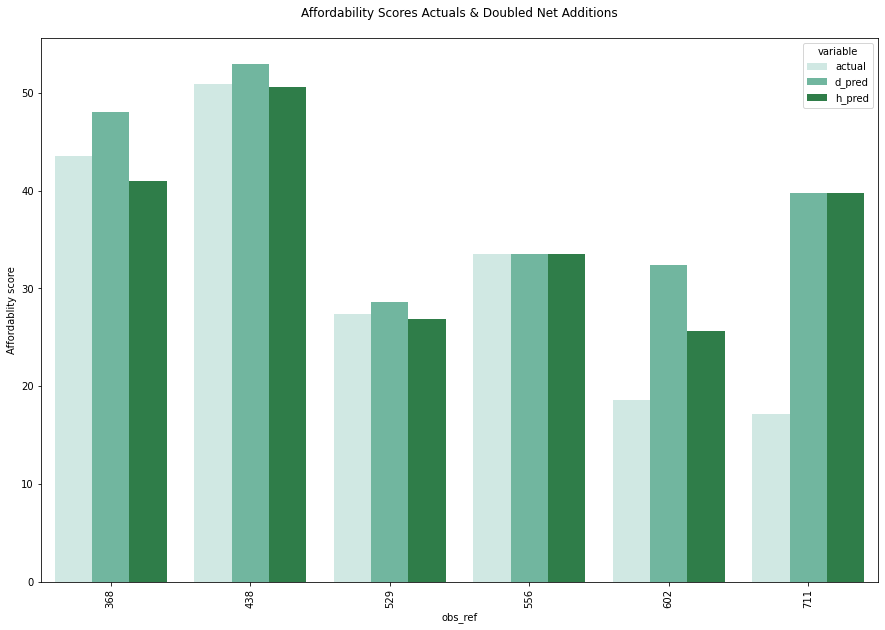

In [38]:
plt.figure(figsize=(15,10))
sns.barplot(x = 'obs_ref', y = 'aff_score', hue = 'variable', data = dummy, palette ='BuGn')
plt.xticks(rotation=90)
plt.ylabel('Affordablity score')
plt.title('Affordability Scores Actuals & Doubled Net Additions\n')
plt.show()

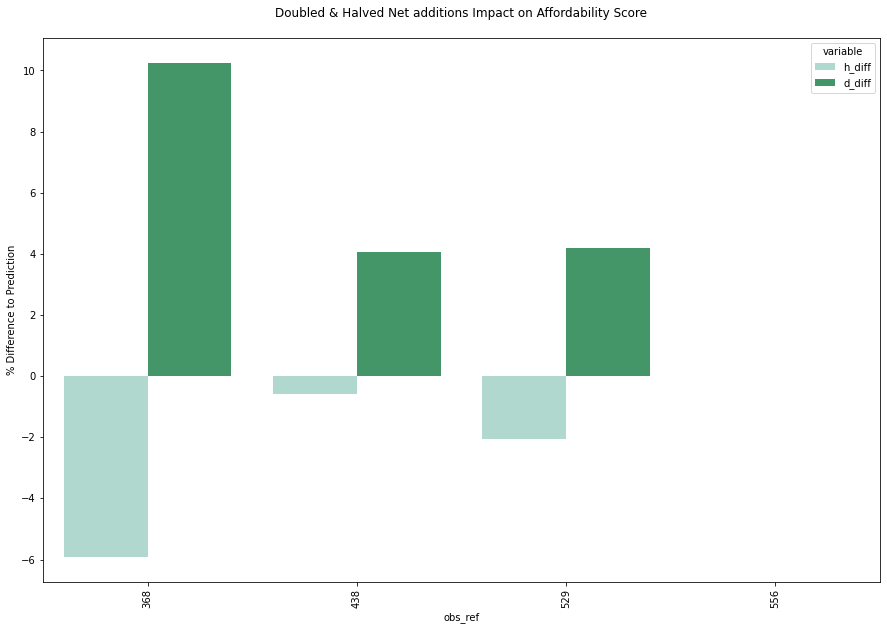

,obs_ref,variable,value
0,368,h_diff,-5.92
1,438,h_diff,-0.59
2,529,h_diff,-2.06
3,556,h_diff,0.00
4,368,d_diff,10.25
5,438,d_diff,4.07
6,529,d_diff,4.19
7,556,d_diff,0.00


In [39]:
df = pd.DataFrame(dummy[['obs_ref','variable','aff_score']])
df = df.pivot(index = 'obs_ref', columns = 'variable', values = 'aff_score').reset_index()
#dropped the two poor predictions, 602 and 711
df = df.iloc[:-2]
                        
df['h_diff'] = (df['h_pred']-df['actual'])/df['actual']*100
df['d_diff'] = (df['d_pred']-df['actual'])/df['actual']*100
new_df = pd.DataFrame(df[['obs_ref', 'h_diff','d_diff']])
new_df = new_df.melt(id_vars = 'obs_ref')

    
plt.figure(figsize=(15,10))
sns.barplot(x = 'obs_ref', y = 'value', hue = 'variable', data = new_df, palette ='BuGn')
plt.xticks(rotation=90)
plt.ylabel('% Difference to Prediction')
plt.title('Doubled & Halved Net additions Impact on Affordability Score\n')
plt.show()
new_df.head(12)

In [40]:
# on model_a dummy:

dummy_a = pd.read_csv( 'mod_a_dummy_output.csv')
dummy_a = dummy_a.drop(columns =['Unnamed: 0','pred'])
dummy_a = dummy_a.melt('obs_ref')
t_set_a = pd.read_csv('la_test_data.csv')
t_data_a = t_set_a.iloc[[92,178,287,368,566,599,699]].reset_index(drop = True)
t_data_a = t_data_a.loc[: ,['Unnamed: 0', 'median_income']]
t_data_a['median_income'] = t_data_a['median_income']/1000
t_data_a['obs_ref'] = [92,178,287,368,566,599,699]
t_data_a = t_data_a.drop(columns = {'Unnamed: 0'})
dummy_a = dummy_a.merge(t_data_a)
dummy_a
#

,obs_ref,variable,value,median_income
0,92,actual,280.00,25.75
1,92,d_pred,275.27,25.75
2,92,h_pred,282.23,25.75
3,178,actual,405.50,33.04
4,178,d_pred,503.97,33.04
5,178,h_pred,510.61,33.04
6,287,actual,235.00,26.51
7,287,d_pred,230.17,26.51
8,287,h_pred,237.70,26.51
9,368,actual,157.50,25.18


In [41]:
val_lst_a = (dummy_a['value']).to_list()
inc_lst_a = (dummy_a['median_income']).to_list()
obs_lst_a = (dummy_a['obs_ref']).to_list()

In [42]:
data_lst_a = list(zip(obs_lst_a, inc_lst_a,val_lst_a))
data_lst_a

[(92, 25.755, 280.0),
 (92, 25.755, 275.27255),
 (92, 25.755, 282.22687),
 (178, 33.04, 405.5),
 (178, 33.04, 503.96713),
 (178, 33.04, 510.61337),
 (287, 26.506, 235.0),
 (287, 26.506, 230.16748),
 (287, 26.506, 237.69807),
 (368, 25.177, 157.5),
 (368, 25.177, 159.40747),
 (368, 25.177, 156.22812),
 (566, 19.567, 94.0),
 (566, 19.567, 94.119),
 (566, 19.567, 93.92364),
 (599, 30.587, 380.0),
 (599, 30.587, 378.5422),
 (599, 30.587, 380.97772),
 (699, 34.935, 425.0),
 (699, 34.935, 574.72815),
 (699, 34.935, 579.8523)]

In [43]:
aff_score_lst = []
for obs, inc, val in data_lst_a:
    affordability_score(obs, inc, val)

dummy_a['aff_score'] = aff_score_lst
dummy_a

24.496487119437933
25.468870757569466
24.012941304057513
20.11204432902148
20.11204432902148
20.11204432902148
30.000000000000007
30.000000000000007
30.000000000000007
43.59406072896764
42.53295855950865
44.26419823911365
54.21602955256802
54.18833918561882
54.233818160018934
16.512150296537246
16.512150296537246
16.512150296537246
23.10458312764143
23.10458312764143
23.10458312764143


,obs_ref,variable,value,median_income,aff_score
0,92,actual,280.00,25.75,24.50
1,92,d_pred,275.27,25.75,25.47
2,92,h_pred,282.23,25.75,24.01
3,178,actual,405.50,33.04,20.11
4,178,d_pred,503.97,33.04,20.11
5,178,h_pred,510.61,33.04,20.11
6,287,actual,235.00,26.51,30.00
7,287,d_pred,230.17,26.51,30.00
8,287,h_pred,237.70,26.51,30.00
9,368,actual,157.50,25.18,43.59


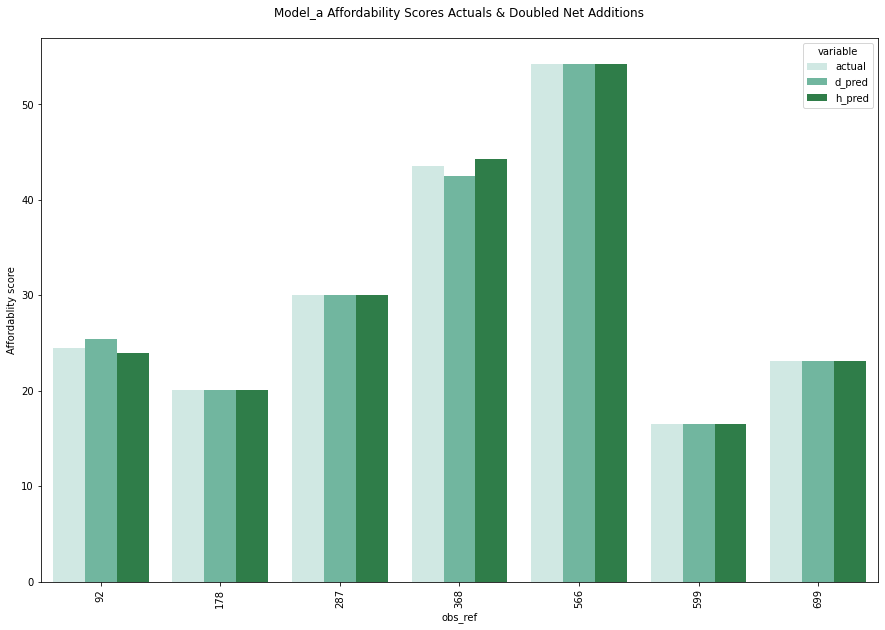

In [44]:
plt.figure(figsize=(15,10))
sns.barplot(x = 'obs_ref', y = 'aff_score', hue = 'variable', data = dummy_a, palette ='BuGn')
plt.xticks(rotation=90)
plt.ylabel('Affordablity score')
plt.title('Model_a Affordability Scores Actuals & Doubled Net Additions\n')
plt.show()

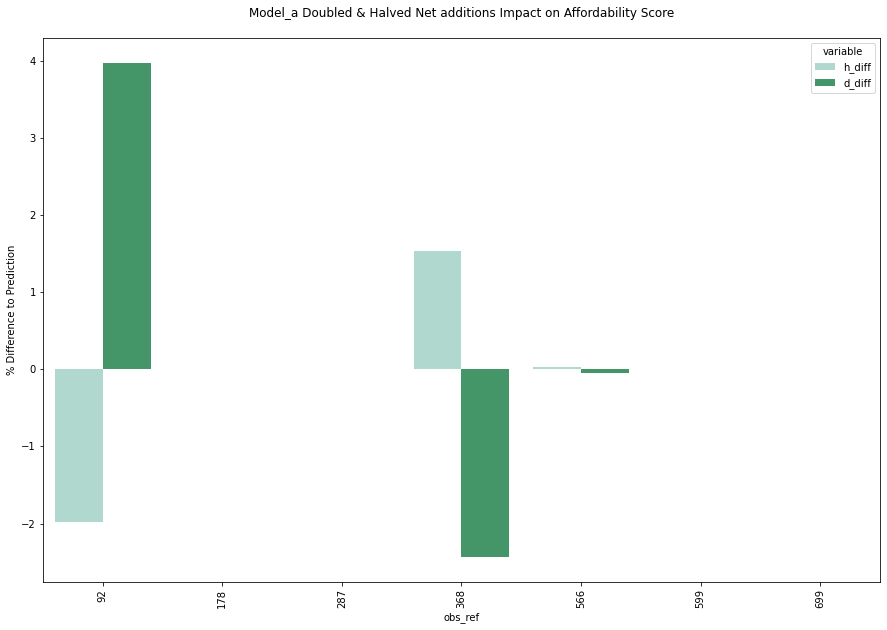

,obs_ref,variable,value
0,92,h_diff,-1.97
1,178,h_diff,0.00
2,287,h_diff,0.00
3,368,h_diff,1.54
4,566,h_diff,0.03
5,599,h_diff,0.00
6,699,h_diff,0.00
7,92,d_diff,3.97
8,178,d_diff,0.00
9,287,d_diff,0.00


In [45]:
df_a = pd.DataFrame(dummy_a[['obs_ref','variable','aff_score']])
df_a = df_a.pivot(index = 'obs_ref', columns = 'variable', values = 'aff_score').reset_index()
#dropped the two poor predictions, 602 and 711
#df_a = df.iloc[:-2]
                        
df_a['h_diff'] = (df_a['h_pred']-df_a['actual'])/df_a['actual']*100
df_a['d_diff'] = (df_a['d_pred']-df_a['actual'])/df_a['actual']*100
new_df_a = pd.DataFrame(df_a[['obs_ref', 'h_diff','d_diff']])
new_df_a = new_df_a.melt(id_vars = 'obs_ref')

    
plt.figure(figsize=(15,10))
sns.barplot(x = 'obs_ref', y = 'value', hue = 'variable', data = new_df_a, palette ='BuGn')
plt.xticks(rotation=90)
plt.ylabel('% Difference to Prediction')
plt.title('Model_a Doubled & Halved Net additions Impact on Affordability Score\n')
plt.show()
new_df_a.head(12)

On SVR Model

In [46]:
# apply to the dummy set, import the test set to match the incomes

dummy_svr = pd.read_csv( 'svr_dummy_output.csv')
dummy_svr = dummy_svr.drop(columns =['Unnamed: 0','pred'])
dummy_svr = dummy_svr.melt('obs_ref')
t_set_svr = pd.read_csv('test_best.csv')
t_data_svr = t_set_svr.iloc[[173,304,367,491,599,602,613]].reset_index(drop = True)
t_data_svr = t_data_svr.loc[: ,['Unnamed: 0', 'median_income']]
t_data_svr['median_income'] = t_data_svr['median_income']/1000
t_data_svr = t_data_svr.rename(columns = {'Unnamed: 0': 'obs_ref'})
dummy_svr = dummy_svr.merge(t_data_svr)
dummy_svr

,obs_ref,variable,value,median_income
0,173,actual,132.00,23.14
1,173,d_pred,128.65,23.14
2,173,h_pred,126.49,23.14
3,304,actual,137.97,19.30
4,304,d_pred,144.79,19.30
5,304,h_pred,141.88,19.30
6,367,actual,256.50,32.02
7,367,d_pred,282.39,32.02
8,367,h_pred,235.90,32.02
9,491,actual,300.00,27.30


In [47]:
val_lst_svr = (dummy_svr['value']).to_list()
inc_lst_svr= (dummy_svr['median_income']).to_list()
obs_lst_svr = (dummy_svr['obs_ref']).to_list()
data_lst_svr = list(zip(obs_lst_svr, inc_lst_svr,val_lst_svr))
data_lst_svr

[(173, 23.143, 132.0),
 (173, 23.143, 128.6545501),
 (173, 23.143, 126.4890685),
 (304, 19.295, 137.973),
 (304, 19.295, 144.7865611),
 (304, 19.295, 141.8794322),
 (367, 32.015, 256.5),
 (367, 32.015, 282.3889023),
 (367, 32.015, 235.9038383),
 (491, 27.295, 300.0),
 (491, 27.295, 316.4593189),
 (491, 27.295, 301.6960676),
 (599, 30.587, 380.0),
 (599, 30.587, 387.674813),
 (599, 30.587, 369.2759991),
 (602, 31.997, 460.0),
 (602, 31.997, 323.0123131),
 (602, 31.997, 303.7515378),
 (613, 31.127, 290.0),
 (613, 31.127, 404.8017914),
 (613, 31.127, 397.265454)]

In [48]:
aff_score_lst = []
for obs, inc, val in data_lst_svr:
    affordability_score(obs, inc, val)

dummy_svr['aff_score'] = aff_score_lst
dummy_svr

49.473970997550424
50.30926428369044
50.773294929772156
41.87763965098145
38.55512775508529
40.01480447706111
44.80777506638034
42.40249457954847
45.90725032931534
20.257777777777793
17.504544362655377
19.959332510464247
16.512150296537246
16.512150296537246
16.512150296537246
18.57473351433979
22.20220609421067
37.05444800112537
35.77121657767021
17.307243470644583
17.307243470644583


,obs_ref,variable,value,median_income,aff_score
0,173,actual,132.00,23.14,49.47
1,173,d_pred,128.65,23.14,50.31
2,173,h_pred,126.49,23.14,50.77
3,304,actual,137.97,19.30,41.88
4,304,d_pred,144.79,19.30,38.56
5,304,h_pred,141.88,19.30,40.01
6,367,actual,256.50,32.02,44.81
7,367,d_pred,282.39,32.02,42.40
8,367,h_pred,235.90,32.02,45.91
9,491,actual,300.00,27.30,20.26


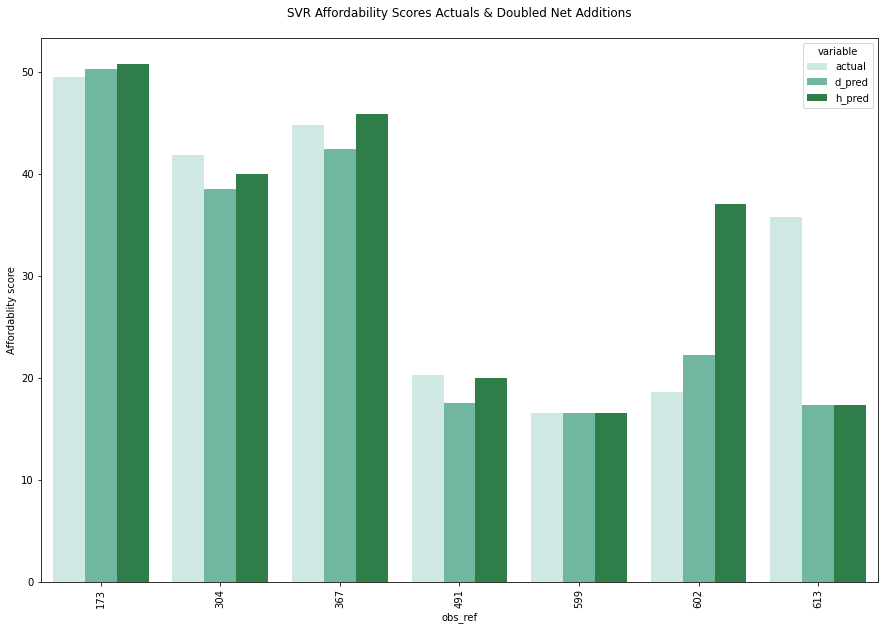

In [49]:
plt.figure(figsize=(15,10))
sns.barplot(x = 'obs_ref', y = 'aff_score', hue = 'variable', data = dummy_svr, palette ='BuGn')
plt.xticks(rotation=90)
plt.ylabel('Affordablity score')
plt.title('SVR Affordability Scores Actuals & Doubled Net Additions\n')
plt.show()

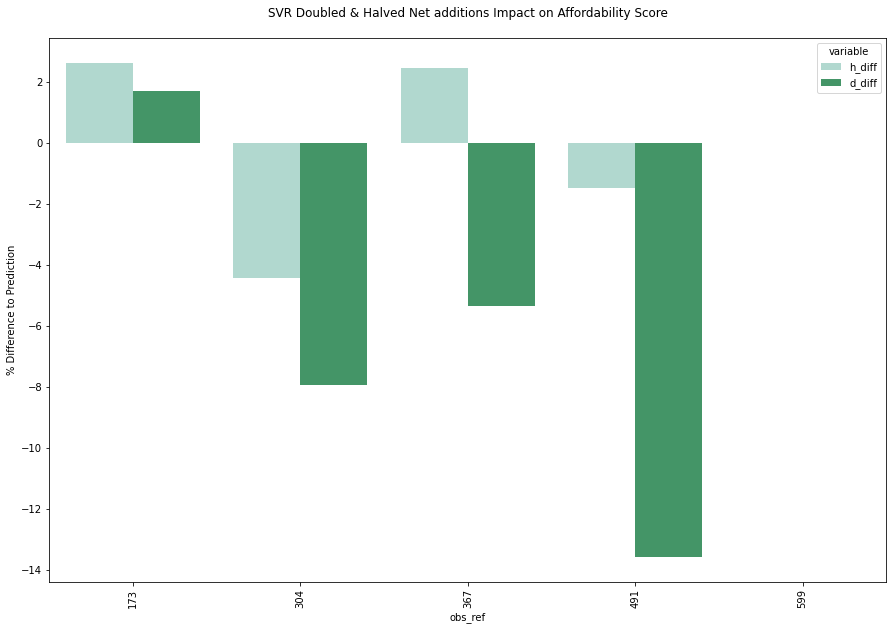

,obs_ref,variable,value
0,92,h_diff,-1.97
1,178,h_diff,0.00
2,287,h_diff,0.00
3,368,h_diff,1.54
4,566,h_diff,0.03
5,599,h_diff,0.00
6,699,h_diff,0.00
7,92,d_diff,3.97
8,178,d_diff,0.00
9,287,d_diff,0.00


In [50]:
df_svr = pd.DataFrame(dummy_svr[['obs_ref','variable','aff_score']])
df_svr= df_svr.pivot(index = 'obs_ref', columns = 'variable', values = 'aff_score').reset_index()
#dropped the two poor predictions, 602 and 711, skewing data to see picture
df_svr = df_svr.iloc[:-2]
                        
df_svr['h_diff'] = (df_svr['h_pred']-df_svr['actual'])/df_svr['actual']*100
df_svr['d_diff'] = (df_svr['d_pred']-df_svr['actual'])/df_svr['actual']*100
new_df_svr = pd.DataFrame(df_svr[['obs_ref', 'h_diff','d_diff']])
new_df_svr = new_df_svr.melt(id_vars = 'obs_ref')

    
plt.figure(figsize=(15,10))
sns.barplot(x = 'obs_ref', y = 'value', hue = 'variable', data = new_df_svr, palette ='BuGn')
plt.xticks(rotation=90)
plt.ylabel('% Difference to Prediction')
plt.title('SVR Doubled & Halved Net additions Impact on Affordability Score\n')
plt.show()
new_df_a.head(12)